<a href="https://colab.research.google.com/github/Ash-Stat/An-Si-Hyun/blob/data/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
housing=pd.read_csv('./cal_housing.csv',encoding='utf-8-sig')
zz=housing.columns

zz=pd.DataFrame(zz)
zz=zz.T

col=['longitude','latitude','housingMedianAge','totalRooms','totalBedrooms','population','households','medianIncome','medianHouseValue']

zz.columns=col
housing.columns=col

housing=pd.concat([zz,housing],axis=0)
housing=housing.reset_index()
housing=housing.drop(['index'],axis=1)
housing=housing.astype(float) # csv파일을 따와서 가공한게 아니라서 이런식의 변환이 필수 불가결 이다.
housing

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.230000,37.880000,41.000000,880.000000,129.000000,322.000000,126.000000,8.325200,452600.000000
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374,845,330,1.5603,78100
20636,-121.21,39.49,18,697,150,356,114,2.5568,77100
20637,-121.22,39.43,17,2254,485,1007,433,1.7,92300
20638,-121.32,39.43,18,1860,409,741,349,1.8672,84700


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   longitude         20640 non-null  object
 1   latitude          20640 non-null  object
 2   housingMedianAge  20640 non-null  object
 3   totalRooms        20640 non-null  object
 4   totalBedrooms     20640 non-null  object
 5   population        20640 non-null  object
 6   households        20640 non-null  object
 7   medianIncome      20640 non-null  object
 8   medianHouseValue  20640 non-null  object
dtypes: object(9)
memory usage: 1.4+ MB


In [163]:
housing=housing.astype(float) #데이터 타입 변경
housing

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue,income_cut,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,5.0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,5.0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4.0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2.0,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2.0,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2.0,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2.0,5.329513,0.219892,2.123209


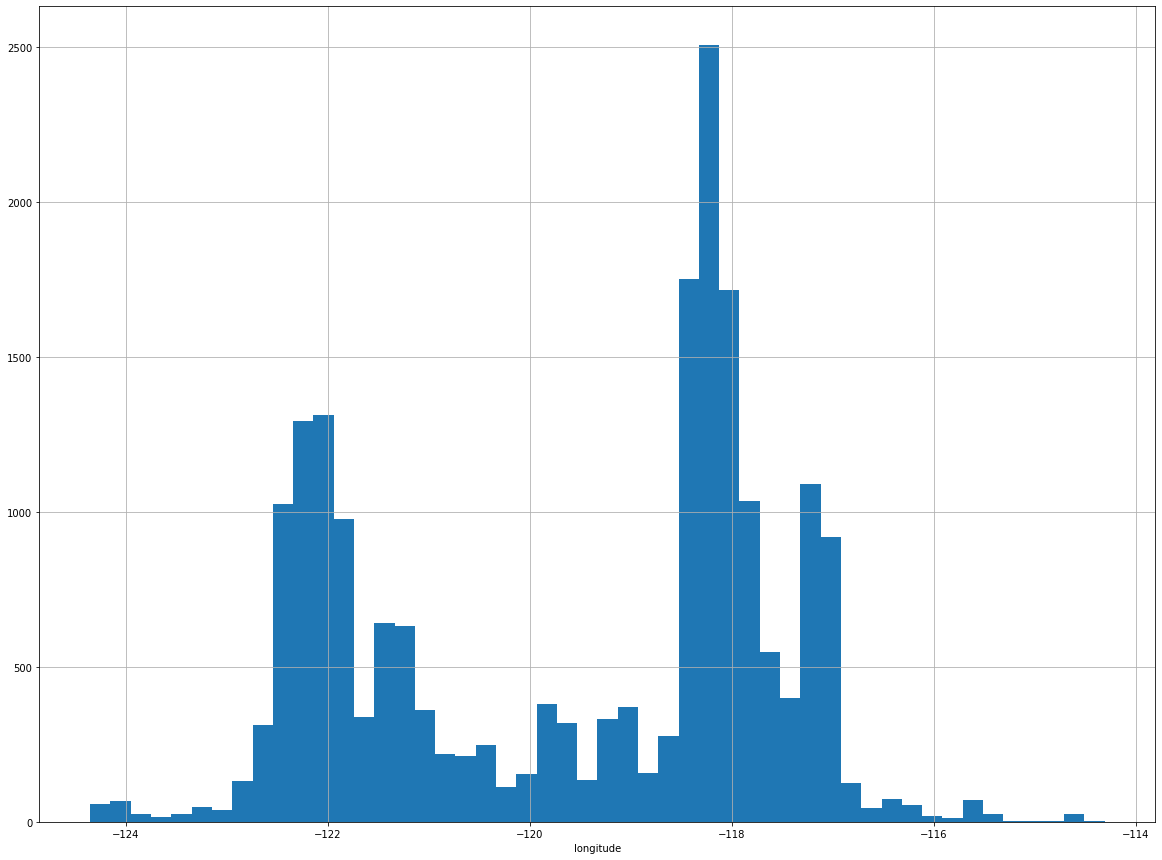

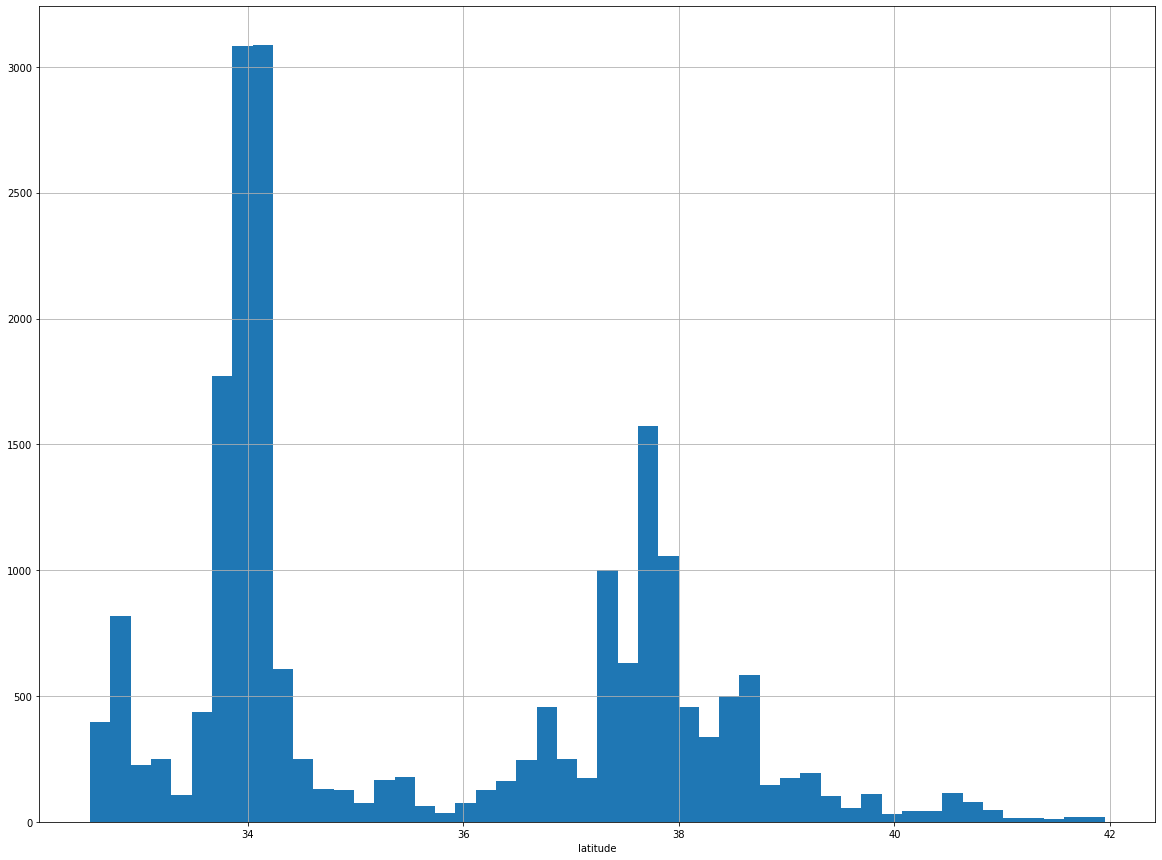

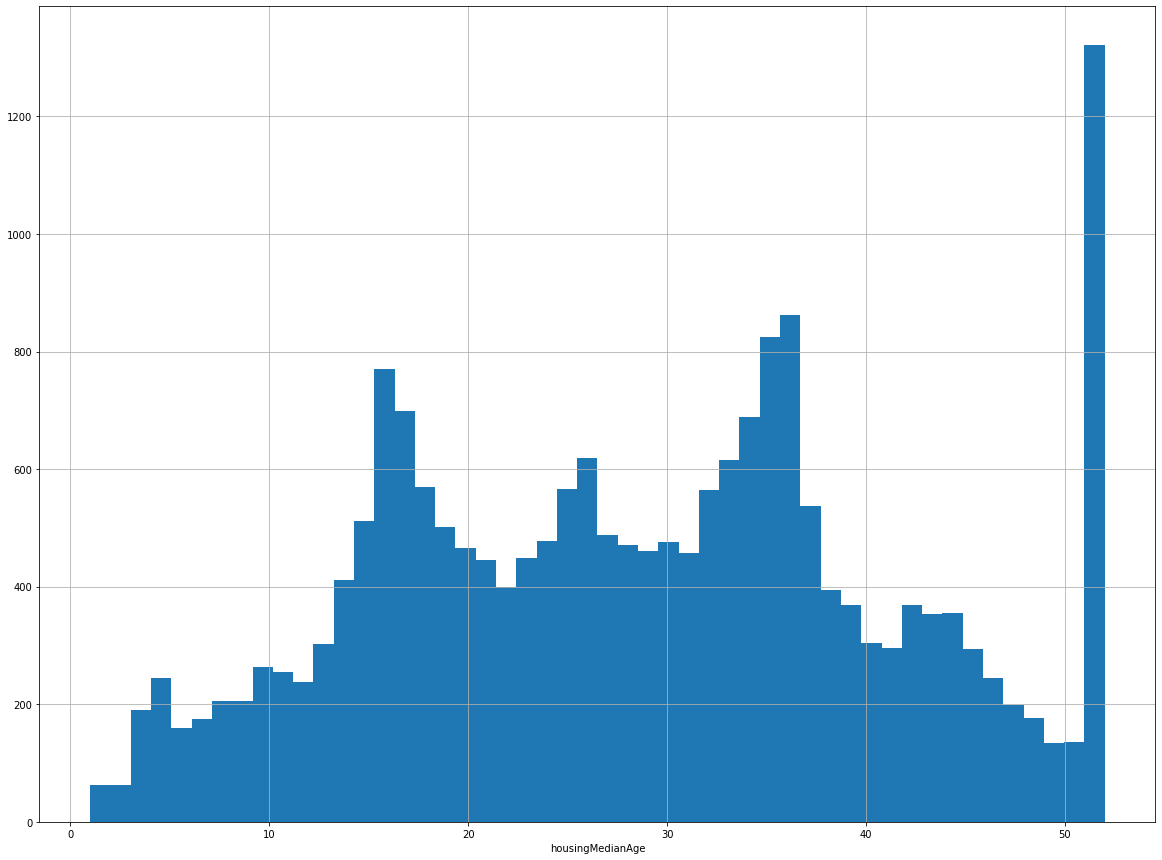

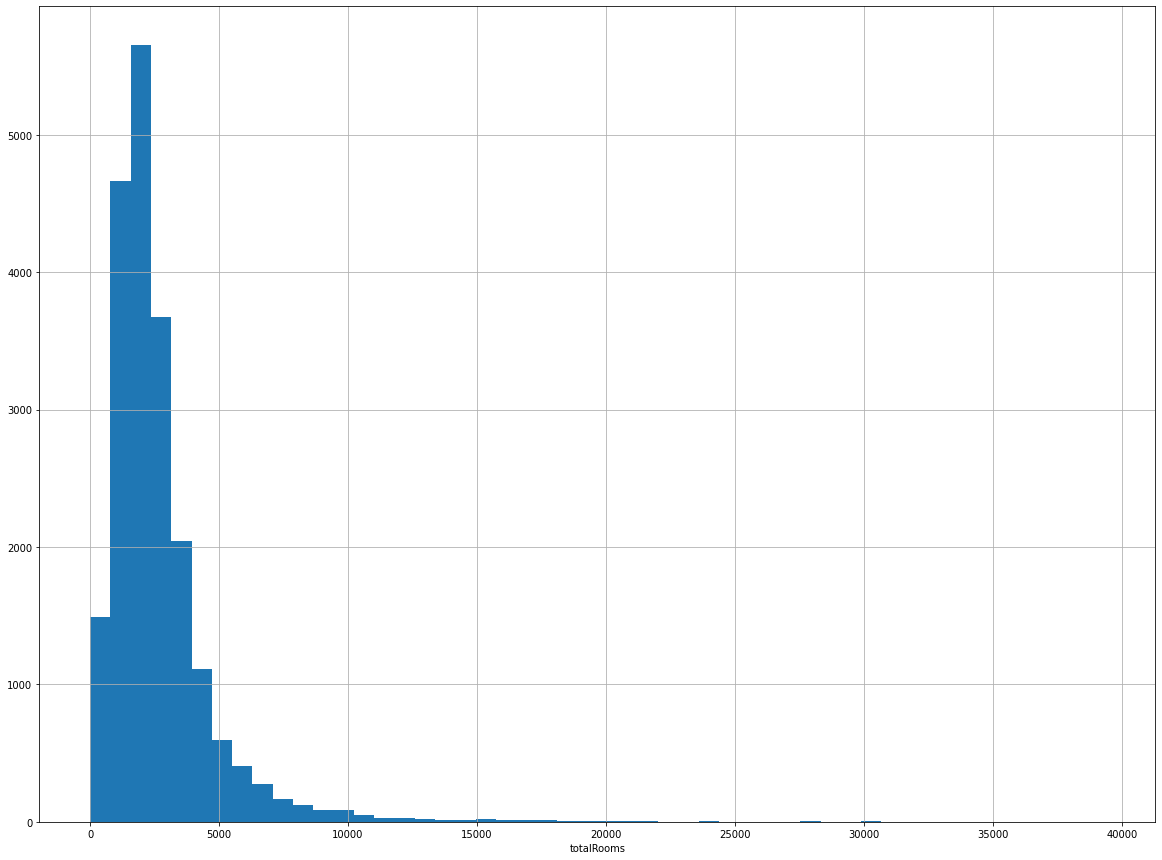

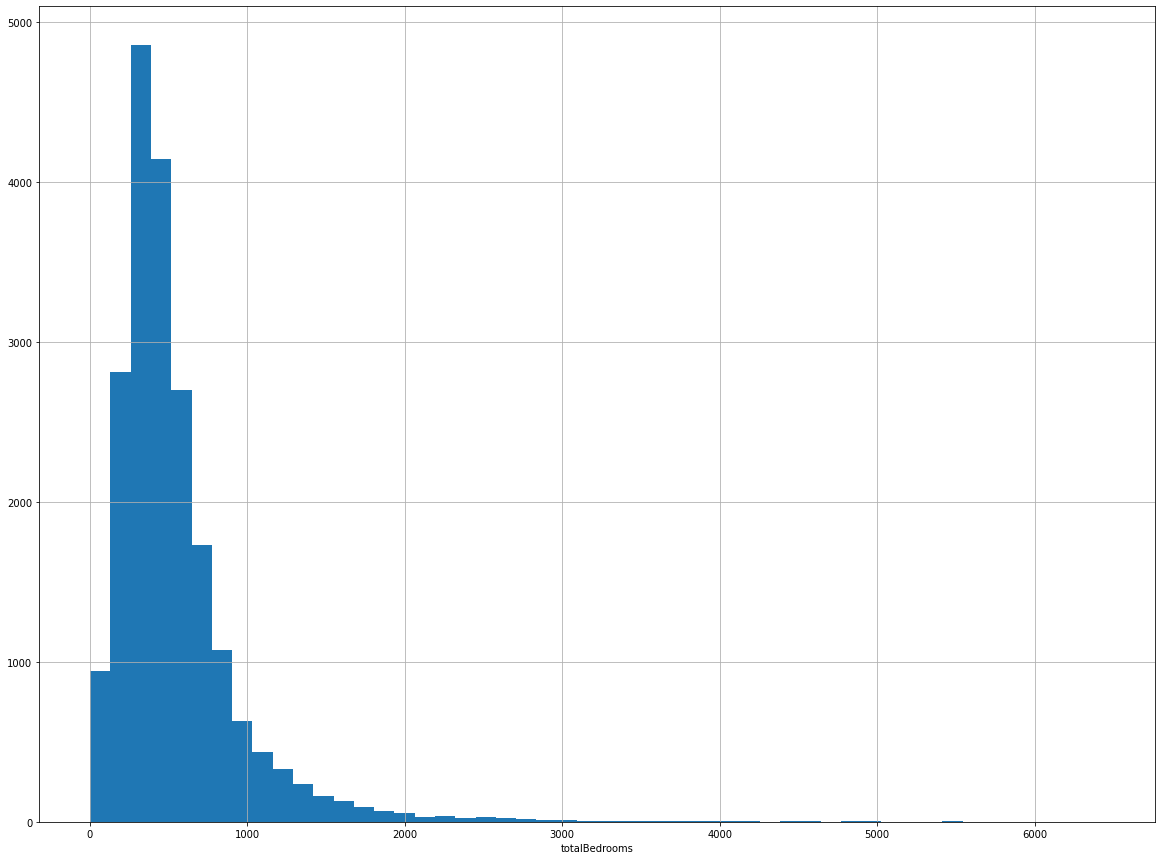

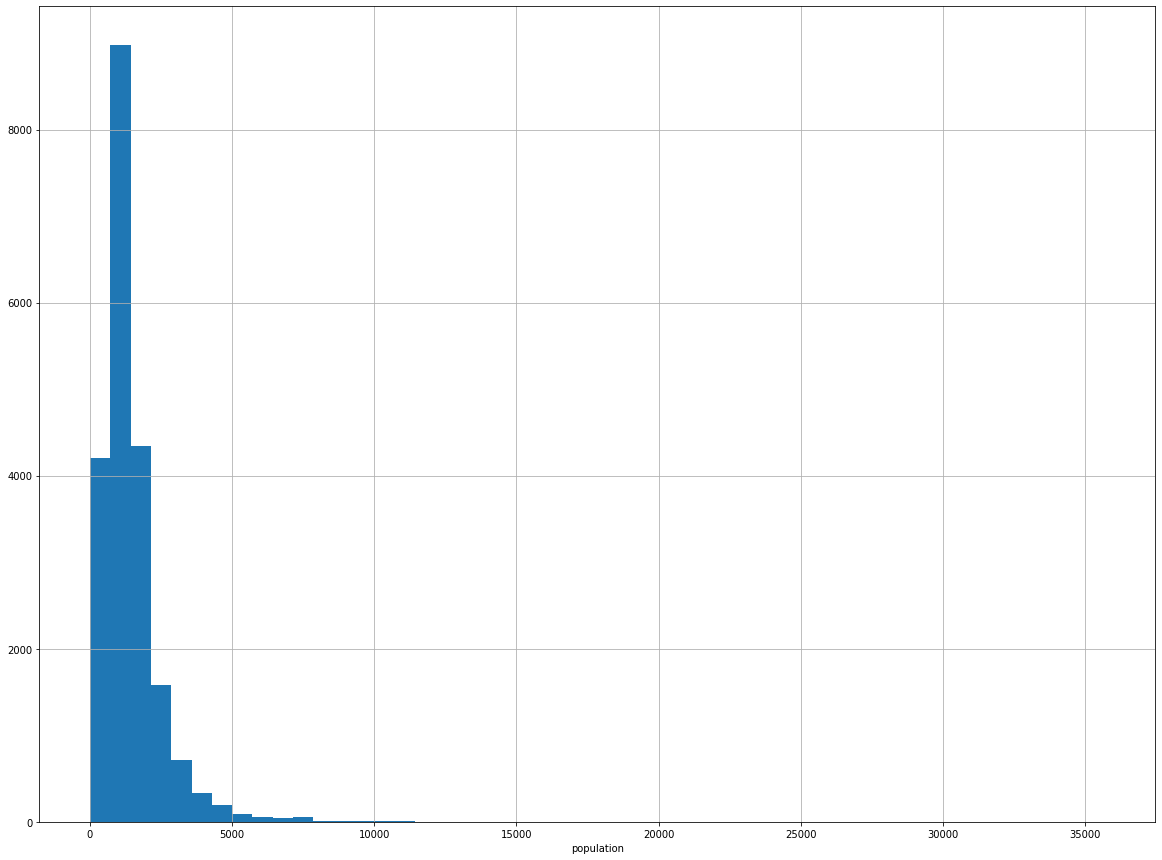

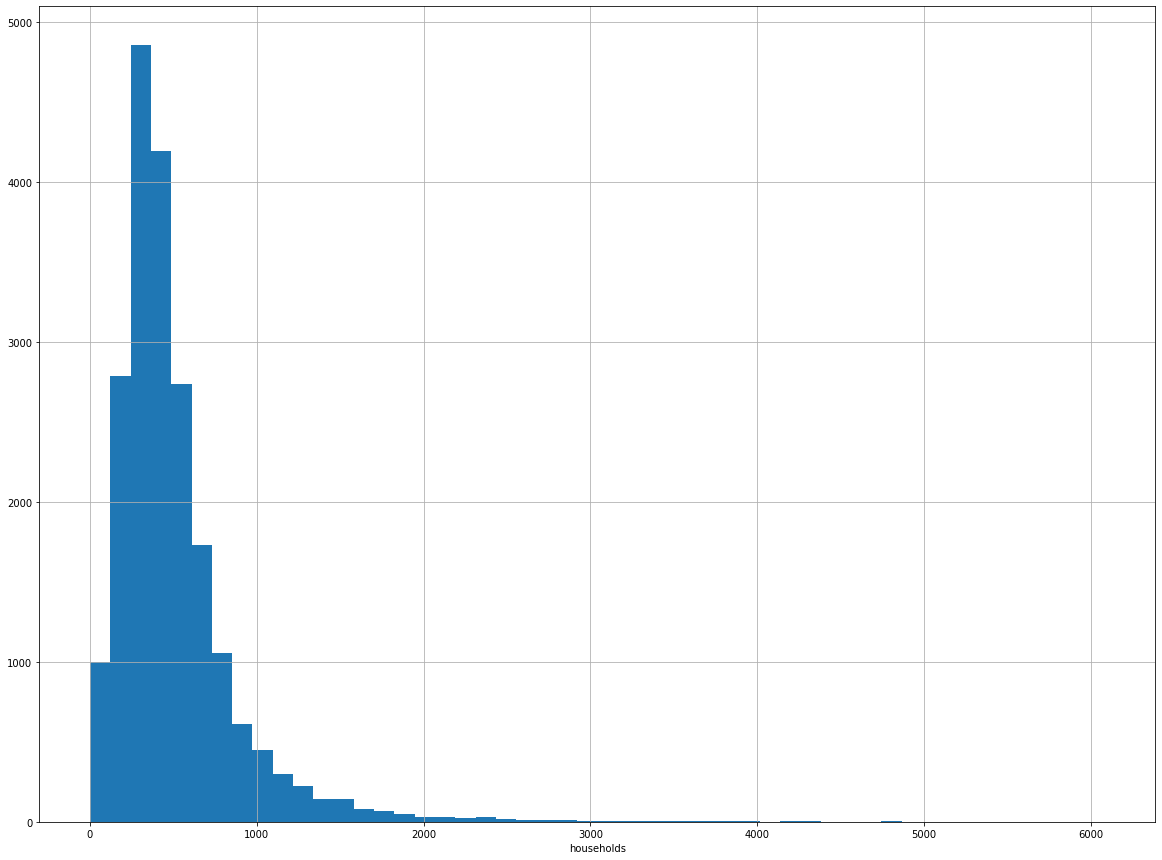

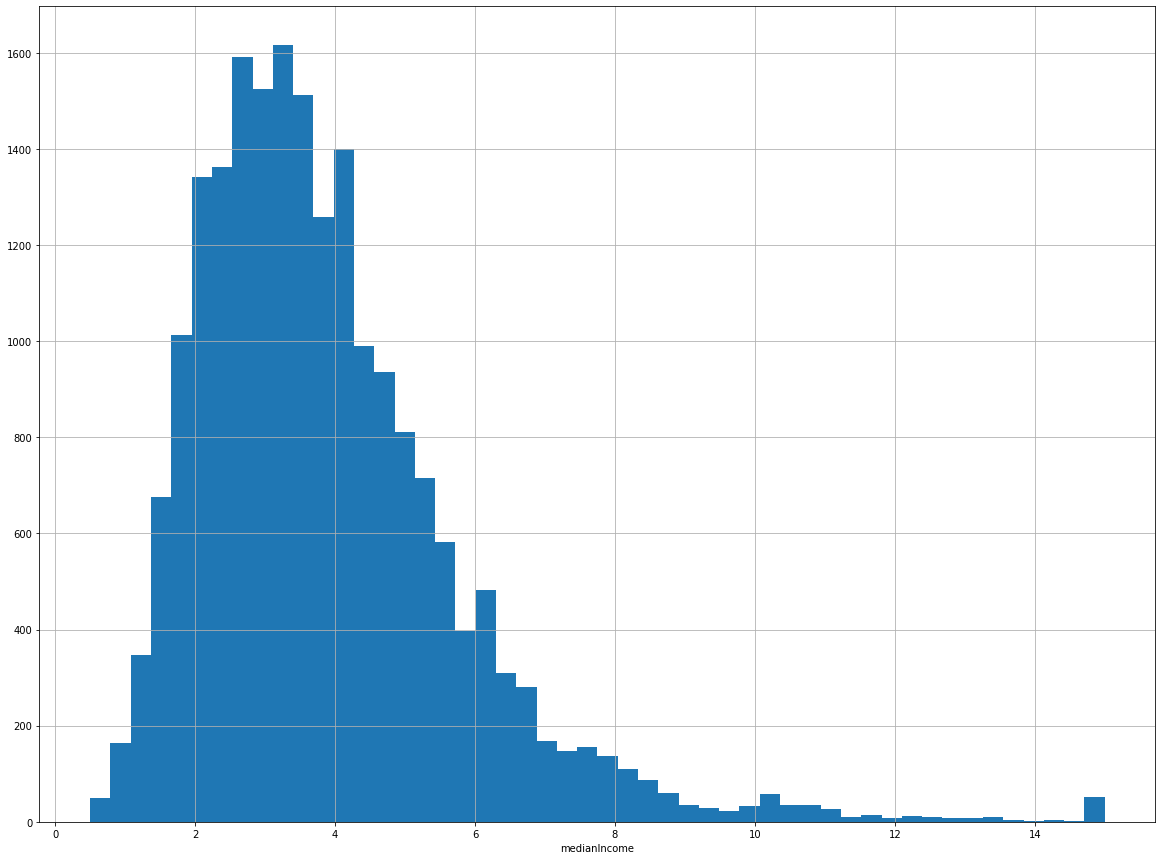

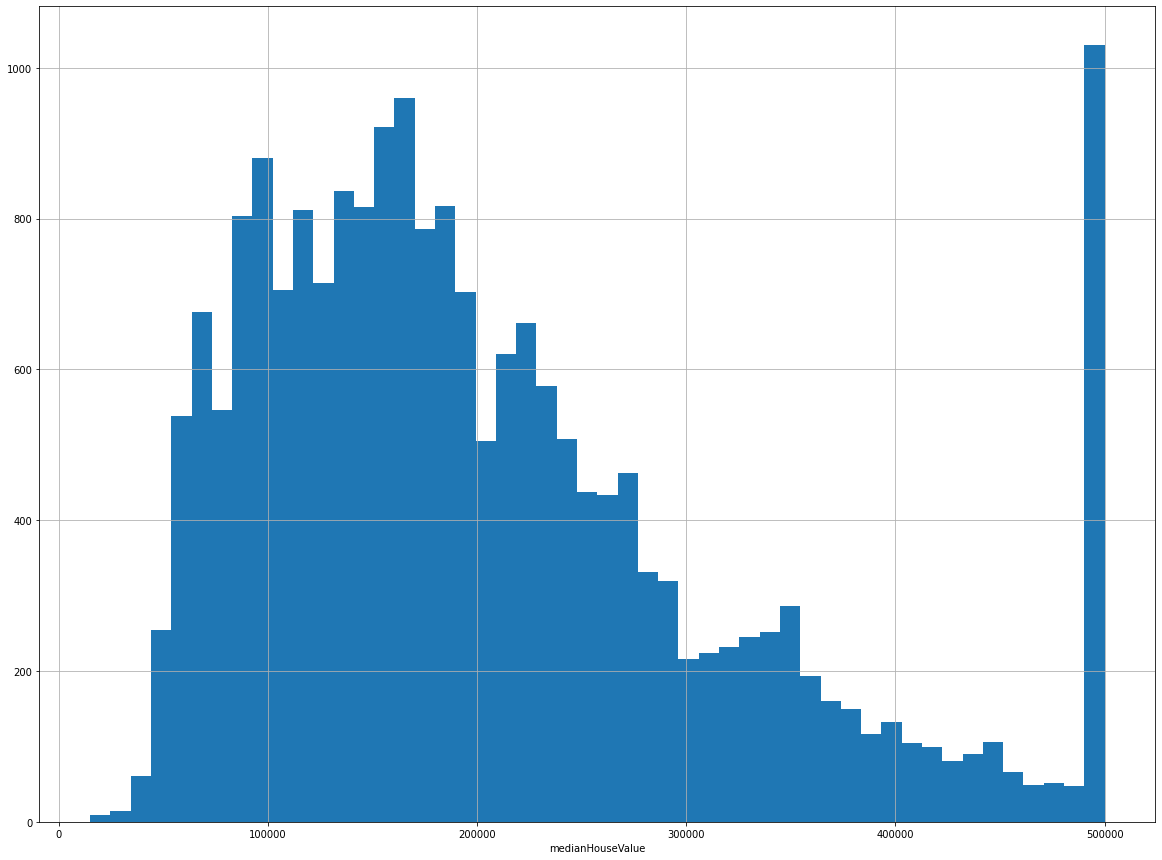

In [ ]:
#데이터의 형태를 검토해보기 위해 숫자형 특성을 히스토그램으로 그려본다.
import seaborn as sns
import matplotlib.pyplot as plt
for colcol in housing:
  plt.xlabel(colcol)
  housing[colcol].hist(bins=50,figsize=(20,15))
  plt.show()

  #히스토그램 오른쪽 끝이 심하게 솟구치면서 끝난다는것은
  #최대값 혹은 최소값이 한정되어 있다는 상황으로 짐작이 가능하다.
    #그런데, 이것이 문제가 될지 안될지는 충분한 고려가 필요하다.
    #예를들어서, 고객으로부터 상한선을 넘어가더라도 정확한 예측값이 필요하다 or 아니다. 등


#---------------------------------------------------------------------------------------------#

#한계값을 넘어가더라도 정확한 예측값이 필요하다면 다음과 같은 두 가지 방법이 있다.

#한계값 밖의 구역에 대한 정확한 레이블을 구한다.

#훈련 세트에서 이런 구역을 제거한다.($500,000가 넘는 값에 대한 예측은 평가 결과가 매우 나쁠 것 이므로 테스트 세트에서도 제거 한다.)

#특성의 스케일 필요

# 히스토 그램의 꼬리가 두꺼운 경우가 많다. 가운데에서 왼쪽보다 오른쪽으로 더 멀리 뻗어있다.
#이런 형태는 일부 머신러닝 알고리즘에서 패턴을 찾기 어렵게 만드므로, 후에 종 모양의 분포가 되도록 변형시켜야 한다.



In [ ]:
#테스트 세트를 만들때 테스트세트를 절대 쳐다보면안된다.

#왜냐하면 우리 뇌는 과적합되기 매우 쉬운 패턴감지 시스템이기 때문에, 테스트 세트를 미리 살펴보면, 겉으로 드러난 어떤 패턴에 속아 특정 머신러닝 모델을 선택하게 될지도 모른다.
#이 테스트 세트로 일반화 오차를 추정하면 매우 낙관적인 추정이 되며 시스템을 론칭했을 때 기대한 성능이 나오지 않을 것이다.
#이를 데이터 스누핑 편향 이라고 한다.

In [10]:
#테스트 데이터 분리 과정

import numpy as np
def test_train(data,ratio):
  shuffled=np.random.permutation(len(data))
  test_set_size=int(len(data)) * ratio
  test_indices=shuffled[:int(test_set_size)]
  train_indices=shuffled[int(test_set_size):]
  return data.iloc[train_indices], data.iloc[test_indices]
train_set, test_set= test_train(housing, 0.2)
print(len(train_set))
print(len(test_set))

16512
4128


In [11]:
import numpy as np
a=np.random.permutation(len(housing))  #데이터 개수만큼 섞고
print(a)
print(len(a))
b=int(len(housing)) * 0.2 #데이터 개수의 몇퍼센트를 이용할건지 테스트로 쓸껀지
c=a[:int(b)]  #그 테스트 데이터 까지 출력
d=a[int(b):] # 그 이후엔 트레인 데이터
print(c)
print(d)
print(housing.iloc[c])

#이렇게 트레인, 테스트 데이터를 나눴으면 이대로 쭉 가야한다.
#이런거는 실행시킬떄마다 바뀌니까 잘 저장해 놓는 것이 중요하다.

test_set=pd.DataFrame(c)
train_set=pd.DataFrame(d)

[14660  4121 15895 ...  2716  9846  9602]
20640
[14660  4121 15895 ... 15998  5138 11047]
[ 4685  4940 18999 ...  2716  9846  9602]
      longitude latitude  ... medianIncome medianHouseValue
14660   -117.14    32.81  ...       4.4886           179100
4121    -118.19    34.14  ...       5.2962           291500
15895    -122.4    37.73  ...       2.6364           199300
14114   -117.11    32.74  ...       3.2422           123100
10834   -117.93    33.69  ...       6.4441           261000
...         ...      ...  ...          ...              ...
8162    -118.13    33.82  ...       3.7321           223700
11346   -117.89    33.77  ...       4.4732           194800
15998   -122.47    37.75  ...       6.1592           381700
5138    -118.28    33.97  ...       1.5521            90100
11047   -117.83    33.81  ...       5.4298           234200

[4128 rows x 9 columns]


In [12]:
test_set

,0
0,14660
1,4121
2,15895
3,14114
4,10834
...,...
4123,8162
4124,11346
4125,15998
4126,5138


In [13]:
train_set

,0
0,4685
1,4940
2,18999
3,20092
4,7256
...,...
16507,6141
16508,10117
16509,2716
16510,9846


In [14]:
#사이킷런으로 서브셋 나누기
#train_test_split

#난수 초깃값을 설정할 수 있는 random_state 매개변수가 있다.
#행의 개수가 같은 여러 개의 데이터셋을 넘겨서 같은 인덱스를 기반으로 나눌 수 있다.
from sklearn.model_selection import train_test_split

train_set1,test_set1=train_test_split(housing, test_size=0.2, random_state=42)

In [15]:
train_set1

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
14196,-117.03,32.71,33,3126,627,2300,623,3.2596,103000
8267,-118.16,33.77,49,3382,787,1314,756,3.8125,382100
17445,-120.48,34.66,4,1897,331,915,336,4.1563,172600
14265,-117.11,32.69,36,1421,367,1418,355,1.9425,93400
2271,-119.8,36.78,43,2382,431,874,380,3.5542,96500
...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35,1330,201,658,217,6.37,229200
11964,-117.43,34.02,33,3084,570,1753,449,3.05,97800
5390,-118.38,34.03,36,2101,569,1756,527,2.9344,222100
860,-121.96,37.58,15,3575,597,1777,559,5.7192,283500


In [16]:
test_set1

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
20046,-119.01,36.06,25,1505,367,1392,359,1.6812,47700
3024,-119.46,35.14,30,2943,697,1565,584,2.5313,45800
15663,-122.44,37.8,52,3830,1142,1310,963,3.4801,500001
20484,-118.72,34.28,17,3051,505,1705,495,5.7376,218600
9814,-121.93,36.62,34,2351,440,1063,428,3.725,278000
...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16,3165,482,1351,452,4.605,263300
16623,-120.83,35.36,28,4323,886,1650,705,2.7266,266800
18086,-122.05,37.31,25,4111,538,1585,568,9.2298,500001
2144,-119.76,36.77,36,2507,466,1227,474,2.785,72300


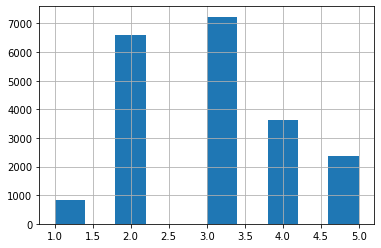

In [17]:
#어떤 타겟변수를 예측할때 전문가가 중간 소득이 중간 주택가격을 예측하는 것에 있어서 매우 중요하다 했을때
#이 경우 테스트 세트가 전체 데이터셋에 있는 여러 소득 카테고리를 잘 대표해야 한다.
#중간 소득이 연속적인 숫자형 특성이므로 소득에 대한 카테고리 특성을 만들어야 한다.
#중간 소득은 대부분 1.5 ~6사이에 있지만 일부는 6을 넘기도 한다.
#계층별로 데이터셋에 충분한 샘플 수가 있어야하고, 그렇지 않으면 계층의 중요도를 추정하는데 편향이 발생한다.
#즉, 너무 많은 계층으로 나누면 안되고, 각 계층은 충분히 커야한다.

#pd.cut()을 이용하여 소득 카테고리 만들기

housing['income_cut']=pd.cut(housing['medianIncome'], bins=[0,1.5,3.0,4.5,6,np.inf], labels=[1,2,3,4,5])
housing['income_cut'].hist()

In [18]:
print(housing['income_cut'])

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cut, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing, housing['income_cut']):
  strat_train_set=housing.loc[train_index]
  strat_test_set=housing.loc[test_index]
  

In [22]:
# 이렇게 계층을 나눈 테스트 셋 샘플이 전체 데이터를 잘 대표하는가?

strat_test_set['income_cut'].value_counts()/len(strat_test_set) #pd.cut으로 나눈 테스트 셋 비율

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cut, dtype: float64

In [24]:
housing['income_cut'].value_counts()/len(housing['income_cut']) #비슷하게 나왔다 ! ( 테스트 샘플이 전체 데이터 셋을 잘 대표해야함)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cut, dtype: float64

In [25]:
#테스트 데이터 셋에서 incomu_cut 특성 제거하여 원래 상태로 되돌려 놓는다.

strat_test_set=strat_test_set.drop(['income_cut'],axis=1)
strat_train_set=strat_train_set.drop(['income_cut'],axis=1)

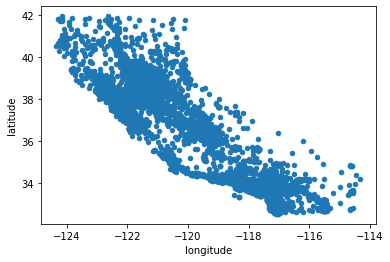

In [26]:
#훈련용 세트만을 가지고 탐색하기

#위도와 경도가 있으니 스캐터로 나타낸다

housing.plot(kind='scatter', x='longitude', y='latitude')

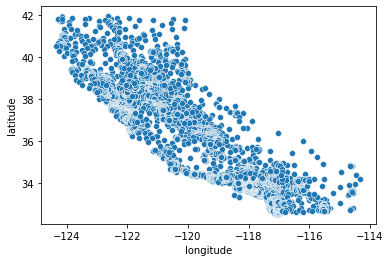

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=housing, x='longitude', y='latitude')

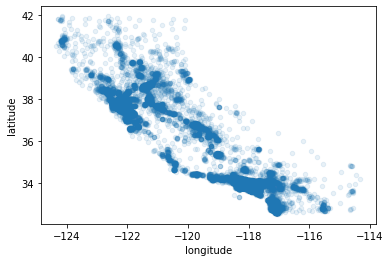

In [35]:
#여기서 알파를 0.1로 주면 밀집된 영역을 잘 보여준다.
# 베이 에어리어와 로스앤젤레스 근처, 샌디에고 부근 그리고 센트럴밸리 특히 새크라멘토와 프레즈노 근처를 따라 밀집된 지역이 긴 띠를 이룬다.
housing.plot(kind='scatter', x='longitude', y='latitude',alpha=0.1)

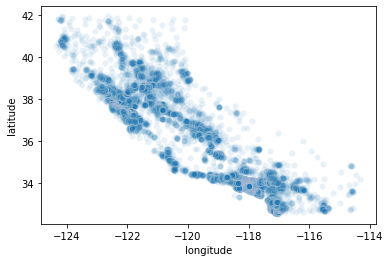

In [36]:
#seaborn 버젼
sns.scatterplot(data=housing, x='longitude', y='latitude',alpha=0.1)

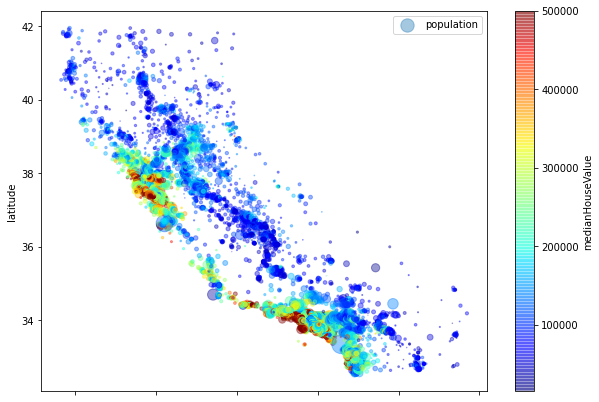

In [59]:
#주택 가격 나타내기

#원의 반지름은 구역의 인구를 나타낸다.(s)
#색상은 가격을 나타낸다(c)

#미리 정의된 컬러 맵중 파란색(낮은가격) 에서 빨간색(높은가격) 까지 범위를 가지는 jet를 사용한다.(매개 변수 cmap)

housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4, s=housing['population']/100, label='population', figsize=(10,7), 
             c='medianHouseValue', 
             cmap=plt.get_cmap('jet'),
             colorbar=True)
plt.legend()

In [57]:
#위 그래프에서 보여지듯, 빨간색은 높은 가격, 파란색은 낮은 가격을 의미한다.

In [60]:
corr_matrix=housing.corr() #상관관계 조사

In [65]:
#중간 주택 가격과 다른 특성사이의 상관관계,

#즉 타겟 변수와 다른 특성과의 관계를 본다.

corr_matrix['medianHouseValue'].sort_values(ascending=False)

#잘보면 위도인 latitude와 주택 가격은 약한 음의 상관관계가 있는데

#그래프에서도 보이듯 북쪽으로 갈수록 주택 가격이 조금쌕 내려가는 경향이 없지 않아 있다.



medianHouseValue    1.000000
medianIncome        0.688075
income_cut          0.643892
totalRooms          0.134153
housingMedianAge    0.105623
households          0.065843
totalBedrooms       0.050594
population         -0.024650
longitude          -0.045967
latitude           -0.144160
Name: medianHouseValue, dtype: float64

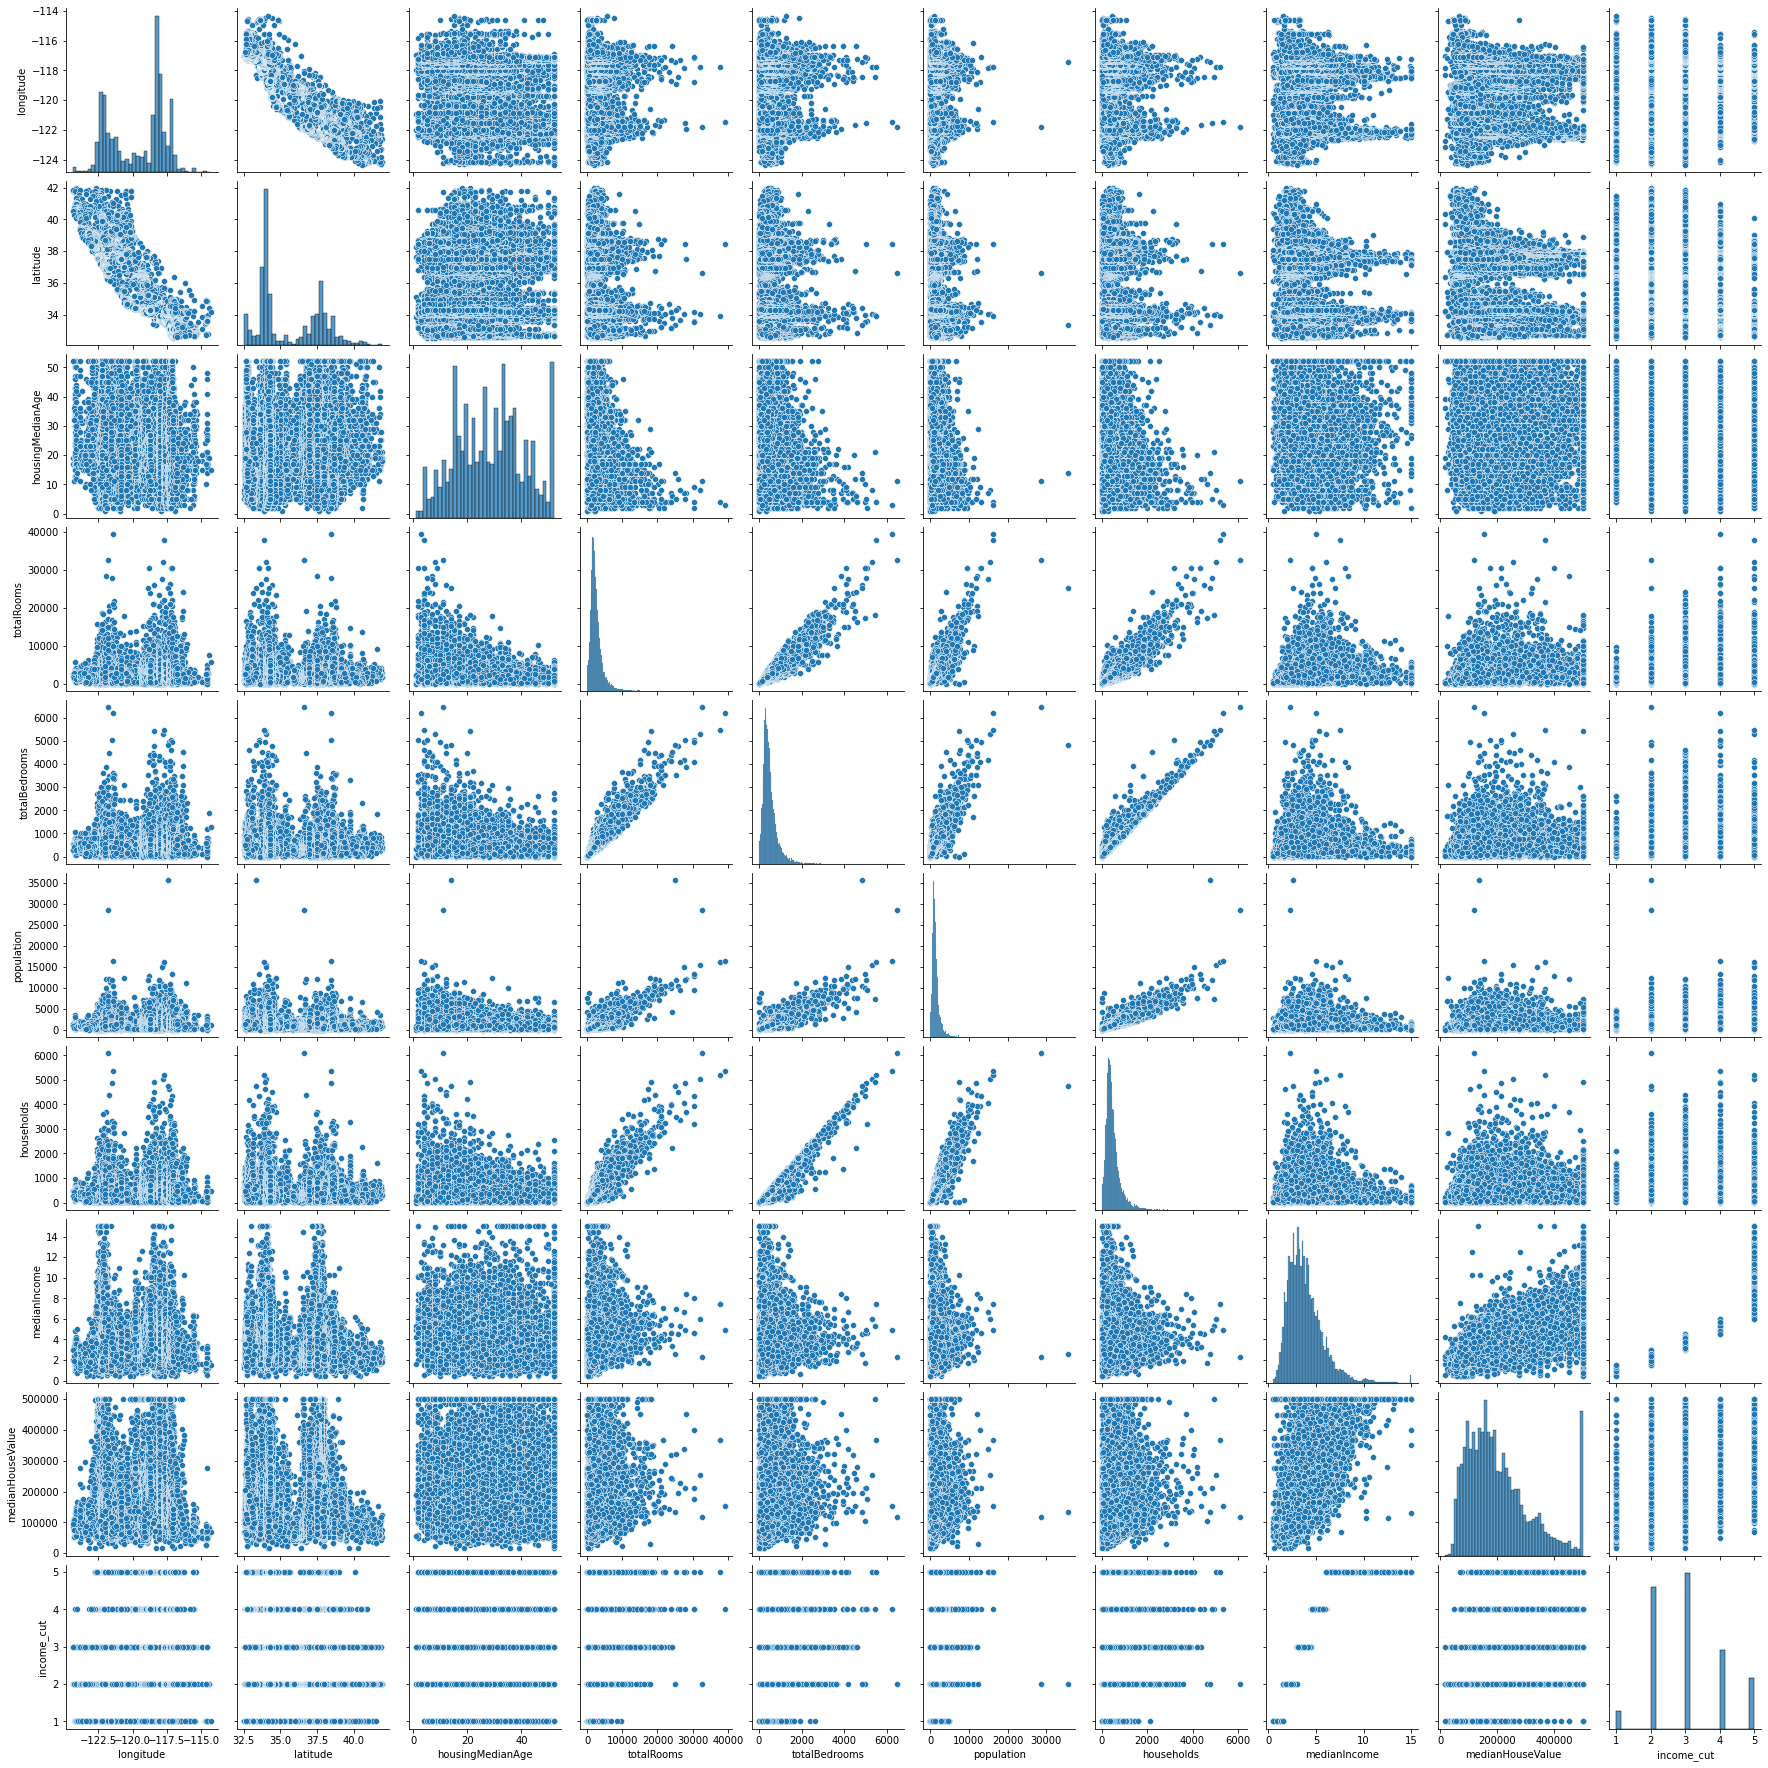

In [68]:
#상관관계를 그래프로 표현해 보기

sns.pairplot(data=housing)

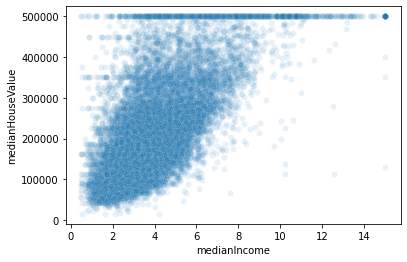

In [71]:
#이 중에서 상관관계에 유의미한 속성을 보여주는 것을 추출해본다.

sns.scatterplot(data=housing,x='medianIncome', y='medianHouseValue',alpha=0.1)

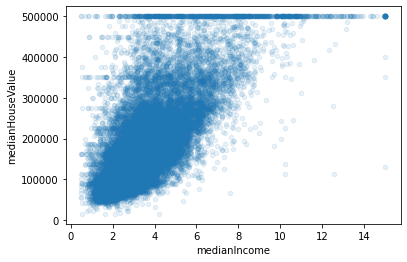

In [74]:
housing.plot(kind='scatter', x='medianIncome',y='medianHouseValue',alpha=0.1)

In [77]:
#이 그래프에서 시사하는 바는 다음과 같다.

#첫째, 상관관계가 매우 강하다, 위쪽으로 향하는 경향과 포인트들이 집중적으로 모여있음을 알 수 있다.

#둘째, 앞서 본 가격 제한값이 $500,000에서 수평선으로 잘 보인다.

#하지만 수평선으로 보이는 것이 $450,000근처와 $350,000, $280,000등에도 있다.

#따라서 이러한 형태를 알고리즘이 학습하지 않도록 해당 구역을 제거하는 것이 좋다.

#어떤 특성은 꼬리가 두꺼운 분포라면 데이터를 변형해야 한다.(로그스케일 등)

#머신러닝 알고리즘을 적용하기 위해 마지막으로 해볼 것은 여러 특성의 조합을 시도해보는 것 이다.

#예를들어 특정 구역의 방개수는 얼마나 많은 가구 수가 있는지 모른다면 그다지 유용하지 않다.

#진짜로 필요한 것은 가구당 방 개수이다.

#즉 이러한 파생변수를 만들어준다.

housing['rooms_per_household'] = housing['totalRooms']/housing['households']
housing['bedrooms_per_room']=housing['totalBedrooms']/housing['totalRooms']
housing['population_per_household']=housing['population']/housing['households']

In [79]:
#파생변수를 만들어 본후 상관관계 행렬을 다시 확인한다.

corr_matrix=housing.corr()
corr_matrix

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue,income_cut,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068378,0.099773,0.055310,-0.015176,-0.045967,-0.010690,-0.027540,0.092868,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066318,-0.108785,-0.071035,-0.079809,-0.144160,-0.085528,0.106389,-0.114302,0.002366
housingMedianAge,-0.108197,0.011173,1.000000,-0.361262,-0.320485,-0.296244,-0.302916,-0.119034,0.105623,-0.146920,-0.153277,0.136367,0.013191
totalRooms,0.044568,-0.036100,-0.361262,1.000000,0.929893,0.857126,0.918484,0.198050,0.134153,0.220528,0.133798,-0.187361,-0.024581
totalBedrooms,0.068378,-0.066318,-0.320485,0.929893,1.000000,0.878026,0.979829,-0.008093,0.050594,0.015544,0.000787,0.086110,-0.028330
population,0.099773,-0.108785,-0.296244,0.857126,0.878026,1.000000,0.907222,0.004834,-0.024650,0.025809,-0.072213,0.037075,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.979829,0.907222,1.000000,0.013033,0.065843,0.038490,-0.080598,0.067022,-0.027309
medianIncome,-0.015176,-0.079809,-0.119034,0.198050,-0.008093,0.004834,0.013033,1.000000,0.688075,0.902750,0.326895,-0.615479,0.018766
medianHouseValue,-0.045967,-0.144160,0.105623,0.134153,0.050594,-0.024650,0.065843,0.688075,1.000000,0.643892,0.151948,-0.255624,-0.023737
income_cut,-0.010690,-0.085528,-0.146920,0.220528,0.015544,0.025809,0.038490,0.902750,0.643892,1.000000,0.313054,-0.628499,0.009608


In [80]:
#머신러닝 알고리즘을 위한 데이터 준비

#이 작업은 수동으로 하는 대신 함수를 만들어 자동화해야 하는 이유가 있다.

#다른 데이터셋이 들어왔을때에도 시간낭비를 안하기 위하여

#점점 나만의 코딩을 스택처럼 쌓아가는 것 이다.

#다양한 알고리즘을 적용할때 손쉽게 적용시킬 수 있다.

#종속과 독립 변수의 분리

train_train=strat_train_set.drop(['medianHouseValue'], axis=1)
train_train

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome
17606,-121.89,37.29,38,1568,351,710,339,2.7042
18632,-121.93,37.05,14,679,108,306,113,6.4214
14650,-117.2,32.77,31,1952,471,936,462,2.8621
3230,-119.61,36.31,25,1847,371,1460,353,1.8839
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.2,46,1271,236,573,210,4.9312
12053,-117.56,33.88,40,1196,294,1052,258,2.0682
13908,-116.4,34.09,9,4855,872,2098,765,3.2723
11159,-118.01,33.82,31,1960,380,1356,356,4.0625


In [81]:
#결측값의 경우 처리할때 몇 가지 방법이 있다.

# 평균으로 채우던가, 보간법으로 채우던가, 아예 삭제하던가, 그 예측변수마저도 회귀분석으로 예측을 시도 하던가

# .median() 메서드는 중간값을 반환 한다.

#사이킷런의 SimpleImputer 를 이용하여 누락된 값 채우기

from sklearn.impute import SimpleImputer #누락된 값을 채우는 모델

imputer=SimpleImputer(strategy = 'median')  #중간값으로 설정

#만약 데이터셋에 범주형 데이터가 있다면, 중간값은 수치형 자료에만 적용될 수 있기 때문에 따로 데이터셋을 만들어 분리 시킨후 적용한다.

imputer.fit(housing)

#imputer는 각 특성의 중간값을 계산해서 그 결과를 객체의 statistics_ 속성에 저장한다.

#물론 지금 하는 과정에 누락된 값이 없지만, 앞으로 업데이트 될 데이터에 누락값이 있을 수 있으니, 모든 수치형 특성에
#imputer를 적용 하는 것이 바람직 하다.
imputer.statistics_

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  3.00000000e+00,  5.22912879e+00,  2.03180665e-01,
        2.81811565e+00])

In [83]:
housing.median().values
#사이킷런의 impute 함수를 이용한 방법과 동일하다.

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  3.00000000e+00,  5.22912879e+00,  2.03180665e-01,
        2.81811565e+00])

In [91]:
X=imputer.transform(housing)
X.shape

(20640, 13)

In [92]:
X=pd.DataFrame(X)

In [94]:
X.columns=housing.columns
X.index=housing.index

In [95]:
X

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue,income_cut,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,5.0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,5.0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4.0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2.0,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2.0,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2.0,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2.0,5.329513,0.219892,2.123209


In [96]:
housing

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue,income_cut,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,5.0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,5.0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4.0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2.0,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2.0,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2.0,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2.0,5.329513,0.219892,2.123209


In [97]:
#fit()은 계산, transform()은 적용이라고 생각하면 된다.

#위 에서는 SimpleImputer 모델 즉, 누락값을 채우는 모델에니, fit()으로 계산할 데이터를 지정하고, transform으로 그 계산한 값으로 누락값을 채운다.

#텍스트와 범주형 특성 다루는 법

#위 데이터에 나와 있지 않아서 따로 만들어서 불러서 진행 해본다.
prac=pd.read_excel('./연습용.xlsx')
prac

,종류,메뉴,지역
0,치킨,고추바사삭,서울
1,치킨,허니콤보,서울
2,피자,치즈피자,경기
3,족발,국수,경기
4,족발,보쌈,충남
5,피자,고구마피자,충북
6,중식,짬뽕,충북
7,중식,짜장면,충남
8,일식,라면,제주
9,한식,불고기,제주


In [118]:
#이 카테고리를 텍스트에서 숫자로 변환 하는 법
#사이킷 런의 OrdinalEncoder을 사용한다.

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

prac_encode=ordinal_encoder.fit_transform(prac)
prac_encode #이처럼 범주를 숫자로 바꿔준다.

array([[ 4.,  1.,  2.],
       [ 4., 11.,  2.],
       [ 5.,  9.,  0.],
       [ 2.,  2.,  0.],
       [ 2.,  4.,  4.],
       [ 5.,  0.,  5.],
       [ 3.,  8.,  5.],
       [ 3.,  7.,  4.],
       [ 1.,  3.,  3.],
       [ 6.,  5.,  3.],
       [ 6.,  6.,  1.],
       [ 6.,  6.,  1.],
       [ 0., 10.,  0.]])

In [121]:
ordinal_encoder.categories_
#적용시킨 OrdinalEncoder()에 카테고리 메서드를 적용해야 한다.

[array(['양식', '일식', '족발', '중식', '치킨', '피자', '한식'], dtype=object),
 array(['고구마피자', '고추바사삭', '국수', '라면', '보쌈', '불고기', '비빔밥', '짜장면', '짬뽕',
        '치즈피자', '햄버거', '허니콤보'], dtype=object),
 array(['경기', '부산', '서울', '제주', '충남', '충북'], dtype=object)]

In [123]:
#이 표현 방식의 문제는 머신러닝 알고리즘이 가까이 있는 두 값이 떨어져 있는 두 값보다 더 비슷하다고 생각한다는 점이다.

#예를들어서 bad, average, good 등과같이 순서가 있는 카테고리의 경우는 괜찮을 수 있다.

#하지만 이러한 경우가 아니라면 일반적으로 카테고리별 이진 특성을 만들어 해결해야한다.

#예를들어 피자가 1이라면 그외 특성은 0으로 만들어주는, 그러한 원-핫 인코딩이 필요하다.

# 1 값을 가지는 것을 핫이라 표현하고 이를 원-핫 인코딩이라 한다.

#이따금 새로운 특성을 더미 특성이라고도 부른다.

#그리고 사이킷런은 범주의 값을 원-핫 벡터로 바꾸기 위한 OneHotEncoder 클래스를 제공한다.

from sklearn.preprocessing import OneHotEncoder
food_encoder=OneHotEncoder()
food_1hot=food_encoder.fit_transform(prac)
food_1hot

<13x25 sparse matrix of type '<class 'numpy.float64'>'
	with 39 stored elements in Compressed Sparse Row format>

In [125]:
#이떄 출력을 살펴보면 넘파이 배열이 아닌 사이파이 희소행렬이다.

#이는 수천 개의 카테고리가 있는 범주형 특성일 경우 매우 효율적이다.

#이런 원-핫 인코딩을 하면 열이 수천 개인 행렬로 변하고 각 행은 1이 하나 뿐이고 그 외에는 모두 0으로 채워져 있다.

#0을 모두 메모리에 저장하는 것은 낭비이므로 희소 행렬은 0이 아닌 원소의 위치만 저장한다.

#이 행렬을 거의 일반적인 2차원 배열처럼 사용할 수 있으나, 넘파이 배열로 바꾸러면 toarry() 메서드를 호출 해야 한다.
food_1hot.toarray()

array([[0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 

In [127]:
#이 또한 categories_ 인스턴스 변수를 사용해 카테고리 리스트를 얻을 수 있다.
food_encoder.categories_

[array(['양식', '일식', '족발', '중식', '치킨', '피자', '한식'], dtype=object),
 array(['고구마피자', '고추바사삭', '국수', '라면', '보쌈', '불고기', '비빔밥', '짜장면', '짬뽕',
        '치즈피자', '햄버거', '허니콤보'], dtype=object),
 array(['경기', '부산', '서울', '제주', '충남', '충북'], dtype=object)]

In [137]:
# 사이킷런이 유용한 변환기를 많이 제공하지만, 특별한 정제 작업이나 어떤 특성들을 조합하는 등의 작업을 위해 자신만의 변환기가 필수이다.

#내가 만든 변환기를(파이프라인과 같은) 사이킷런의 기능과 매끄럽게 연동하고 싶을 것 이다.

#사이킷런은 (상속이 아닌) 덕 타이핑을 지원하므로  fit() <- self를 반환, transform() 혹은 fit_transform()메서드를 구현한 파이썬 클래스를 만들면 된다.

#여기서 덕타이핑이란 객체의 속성이나 메서드가 객체의 유형을 결정하는 방식이다.

#마지막 메서드는 TransformerMixin을 상속하면 자동으로 생성된다. 또한, BaseEstimator를 상속하면(생성자에 *args, **kargs를 사용하지 않으면)

#하이퍼 파라미터 튜닝에 필요한 두 메서드(get_params(), set_params())를 추가로 얻게 된다.

#여기서 Mixin이란, 파이썬에서 이름에 Mixin이 있다면 객체의 기능을 확장하려는 목적으로 만들어진 클래스를 나타낸다.

#TransformerMixin은 fit_transform() 메서드 하나를 가지고 있으며 이를 상속하는 모든 파이썬 클래스에 이 메서드를 제공한다.

#그리고 TransformerMixin의 fit_transform() 메서드는 단순히 fit() 와 transform()을 메서드 연결한 것이다.

##조합 특성을 추가하는 간단한 변환기 ###

from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True): #*args나 **kargs가 아니다
    self.add_bedrooms_per_room=add_bedrooms_per_room
  def fit(self, X,y=None):
      return self # 더 할 일이 없다.
  def transform(self,X):
    rooms_per_household = X[:,rooms_ix] / X[:,households_ix]
    population_per_household =X[:,population_ix] / X[:,households_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:,bedrooms_ix]/X[:, rooms_ix]
      return np.c_[X,rooms_per_household, population_per_household, bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]

attr_adder= CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs=attr_adder.transform(housing.values)


In [138]:
# 데이터에 적용할 가장 중요한 변환 중 하나가 특성 스케일링 이다.

# 만약 입력 숫자 특성들의 스케일이 많이 다르면 잘 작동하지 않는다.

# 타깃값에 대한 스케일링은 일반적으로 불필요 하다.

# 모든 특성의 범위를 같게 만들어주는 방법으로 min-max 스케일링 과 표준화(standardization)가 널리 사용된다.

# min-max 스케일링이 가장 간단한데, 0~1범위에 들도록 값을 이동하고 스케일을 조정하면 된다.

# 데이터에서 최솟값을 뺀 후 최댓값과 최솟값의 차이로 나누면 가능하다.

# 사이킷런에서는 이에 해당하는 MinMaxScaler 변환기를 제공한다.

# 0~1사이를 원하지 않는다면 feature_range 매개변수로 범위를 변경할 수 있다.

# 표준화는 평균을 뺀후 표준편차로 나누어 분산이 1이 되도록 한다.

# min-max스케일링과는 다르게 표준화는 범위의 상한과 하한이 없어 어떤 알고리즘에서는 문제가 될 수 있다.

# 예를들어 신경망의 경우 종종 입력값의 범위를 0에서 1사이를 기대한다.

# 하지만 표준화는 이상치에 영향을 덜 받는다.

# 표준화의 경우 StandardScaler 변환기를 사용 한다.

# 모든 변환기에서 스케일링은 전체 데이터가 아닌, 훈련 데이터에 대해서만 fit()메서드를 적용해야한다.

# 그런 다음 훈련 세트와 테스트세트에 대해 transform() 메서드를 사용한다.

# 이렇게 많은 변환 단계가 있는데, 사이킷런에서는 연속된 변환을 순서대로 처리할 수 있도록 도와주는 Pipeline 클래스가 있다.

# 다음은 숫자 특성을 처리하는 간단한 파이프라인 이다.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy='median')),
                         ('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(train_train)


In [140]:
from sklearn.compose import ColumnTransformer

num_attribs= list(train_train)

full_pipeline=ColumnTransformer([
                                 ('num', num_pipeline, num_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

In [149]:
from sklearn.linear_model import LinearRegression

lin_reg= LinearRegression() #모델 생성
lin_reg.fit(housing_prepared, housing['medianHouseValue'])  #x값 y값 넣기 

#여기까지가 훈련 완료!

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [152]:
#훈련 세트에 있는 몇개 샘플에 대해 적용

some_data=housing.iloc[:5]
some_labels=housing['medianHouseValue'].iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('예측 :',lin_reg.predict(some_data_prepared))
print('레이블 :',list(some_labels))

# 그렇게 정확도가 높진 않다.

예측 : [408107.33274057 433867.34830716 376134.62131785 320111.69471838
 246866.24126525]
레이블 : [452600.0, 358500.0, 352100.0, 341300.0, 342200.0]


In [154]:
#이에대한 오차검증, RMSE측정

from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing['medianHouseValue'], housing_predictions) #타겟값, 예측값
lin_rmse=np.sqrt(lin_mse)
lin_mse

4702750697.029192

In [155]:
Y=housing['medianHouseValue']
X=housing.drop(['medianHouseValue'],axis=1)

In [156]:
#간단히 말해서 스케일링 순서는 다음과 같다.

#결측값 채우기(보간, 중간값, 평균 등)

#정규화, 표준화 등

#파이프라인 없이 해보기
from sklearn.model_selection import 
from sklearn.preprocessing import MinMaxScaler

from sklearn.impute import SimpleImputer #누락된 값을 채우는 모델

imputer=SimpleImputer(strategy = 'median')  #중간값으로 설정

#만약 데이터셋에 범주형 데이터가 있다면, 중간값은 수치형 자료에만 적용될 수 있기 때문에 따로 데이터셋을 만들어 분리 시킨후 적용한다.

imputer.fit(housing)
imputer.statistics_
#imputer는 각 특성의 중간값을 계산해서 그 결과를 객체의 statistics_ 속성에 저장한다.

#물론 지금 하는 과정에 누락된 값이 없지만, 앞으로 업데이트 될 데이터에 누락값이 있을 수 있으니, 모든 수치형 특성에
#imputer를 적용 하는 것이 바람직 하다.

#이 카테고리를 텍스트에서 숫자로 변환 하는 법
#사이킷 런의 OrdinalEncoder을 사용한다.

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

prac_encode=ordinal_encoder.fit_transform(prac)
prac_encode #이처럼 범주를 숫자로 바꿔준다.

scaler=MinMaxScaler() #정규화 모델 설정
scaler.fit(X) #정규화 학슴
x_scale=scaler.transform(X) #정규화 적용

In [162]:
from sklearn.linear_model import LinearRegression
model=LinearRegression() #선형회귀 모델 설정
model.fit(x_scale,Y) #선형 회귀모델 학습

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.predict()